In [66]:
__version__ = '20180806'

# Imports and setup
We import all modules required for this notebook.

In [122]:
# std. lib
import sys
sys.path.append('../../../hypercat/hypercat/')

# 3rd party
import pylab as plt

# hypercat
import hypercat
import plotting
import bigfileops as bfo
import ioops

In [71]:
#hdffile = '/Volumes/Kohei_HDD_201803/hypercat/hypercat_20180417.hdf5'
hdffile = '/home/robert/data/hypercat/hypercat_20180417.hdf5'

# Map the image hypercube in memory
The simplest way to access the image data in the hypercube is via the 'ontheflymode':

In [72]:
imgcube = hypercat.ModelCube(hdffile, hypercube='imgdata', subcube_selection='minimal')

Opening HDF5 file: /home/robert/data/hypercat/hypercat_20180417.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading  hypercube 'imgdata' [shape: (5,10,16,12,5,7,19,121,241)] to RAM (693.51 GB required) ...
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  75.000]  (  5)    15.000, 30.000, 45.000, 60.000, 75.000
   i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, 80.000, 90.000
   Y*    [  5.000 -  20.000]  ( 16)     5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, 12.000, 13.000, 14.000, 15.000, ...
   N*    [  1.000 -  12.000]  ( 12)     1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, ...
   q*    [  0.000 -   2.000]  (  5)     0.000,  0.500,  1.000,  1.500,  2.000
  tv*    [ 10.000 - 160.000

This method does not load any data into memory yet, i.e. it is very convenient to inspect the content of the cube.
All parameter names printed in bold (or marked with an asterisk) can be continuously interpolated with the cube's envelope.

## Get images via low-level functions

In [90]:
sig, i, Y, N, q, tv, wave = 43, 75, 18, 4, 0.08, 70, 3.45  # example parameters, here e.g. for NGC1068 from Lopez-Rodriguez+2018
vec = (sig, i, Y, N, q, tv, wave)

In [48]:
img = imgcube(vec)

Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.


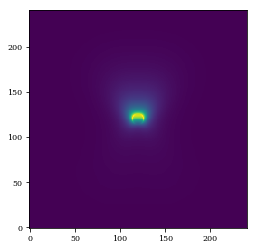

In [49]:
plt.imshow(img.T,origin='lower');

You can also use Hypercat's convenient plotting function:

Plotting panel (0,0)


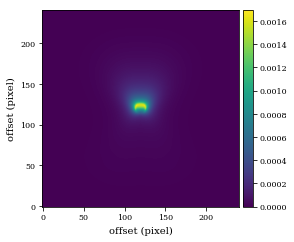

In [51]:
plotting.multiplot(img);

# Load subcube from `.json` file
A subcube selection which was previously saved to a `.json` file (we provide one here) can be repeated by loading from that file:

In [73]:
imgcube = hypercat.ModelCube(hdffile, hypercube='imgdata', subcube_selection='hypercatbasics.json')

Opening HDF5 file: /home/robert/data/hypercat/hypercat_20180417.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading objects from file hypercatbasics.json.
Loading hyperslab [shape: (2,10,1,4,1,1,7,121,241)] from hypercube 'imgdata' [shape: (5,10,16,12,5,7,19,121,241)] to RAM (62.29 MB required) ...
Done.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  30.000]  (  2)    15.000, 30.000
   i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, 80.000, 90.000
   Y     [ 20.000 -  20.000]  (  1)    20.000
   N*    [  1.000 -   6.000]  (  4)     1.000,  4.000,  5.000,  6.000
   q     [  0.000 -   0.000]  (  1)     0.000
  tv     [ 40.000 -  40.000]  (  1)    40.000
wave

Note that this mode actually loads the subcube into memory immediately. Non-bold parameters are single-valued, and can thus not be interpolated. They are fixed. 

You can also interpolate images at multiple parameters vectors, e.g. multiple wavelengths:

In [53]:
wave = (2.2, 3.5, 8, 10)  # 4 wavelengths
vec = (30, 75, 5, wave) # sig, i, N, wave (only the bold-printed parameters)
img = imgcube(vec)
img.shape # note the shape of this "image": it has 4 slices in this case

(4, 241, 241)

You can extract the slices easily:

In [54]:
images = [img[j,...] for j in range(4)]

Plotting panel (0,0)
Plotting panel (0,1)
Plotting panel (0,2)
Plotting panel (0,3)


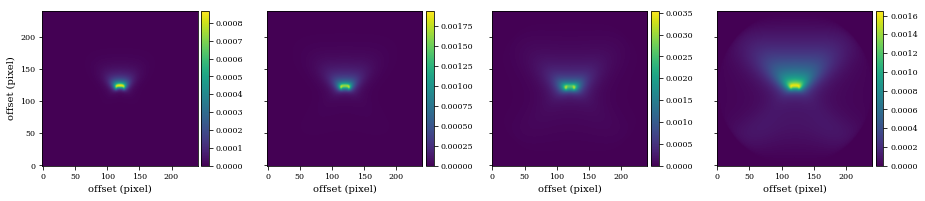

In [55]:
plotting.multiplot(images);

You can also use Hypercat's convenient plotting function:

# Store a subcube to its own `.hdf5` file

In [62]:
bfo.storeCubeToHdf5(imgcube,'hypercatbasics_subcube.hdf5')

In [63]:
imgcube = hypercat.ModelCube('hypercatbasics_subcube.hdf5', hypercube='imgdata', subcube_selection=None)

Opening HDF5 file: hypercatbasics_subcube.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading  hypercube 'imgdata' [shape: (2,10,1,4,1,1,7,121,241)] to RAM (62.29 MB required) ...
Done.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  30.000]  (  2)    15.000, 30.000
   i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, 80.000, 90.000
   Y     [ 20.000 -  20.000]  (  1)    20.000
   N*    [  1.000 -   6.000]  (  4)     1.000,  4.000,  5.000,  6.000
   q     [  0.000 -   0.000]  (  1)     0.000
  tv     [ 40.000 -  40.000]  (  1)    40.000
wave*    [  2.200 -  10.000]  (  7)     2.200,  3.500,  4.800,  8.700,  9.300,  9.800, 10.000
   x     [  0.000 - 120.000]  

# Hypercube of 2-d projected cloud maps

The hdf5 file comprises also a second cube, which contains the 2-d projected dust cloud maps, `clddata`. Accessing it is analogous:

In [74]:
cldcube = hypercat.ModelCube(hdffile, hypercube='clddata', subcube_selection='hypercatbasics.json')

Opening HDF5 file: /home/robert/data/hypercat/hypercat_20180417.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading objects from file hypercatbasics.json.
Loading hyperslab [shape: (2,10,1,1,121,241)] from hypercube 'clddata' [shape: (5,10,16,5,121,241)] to RAM (2.22 MB required) ...
Done.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
sig*    [ 15.000 -  30.000]  (  2)    15.000, 30.000
  i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, 80.000, 90.000
  Y     [ 20.000 -  20.000]  (  1)    20.000
  q     [  0.000 -   0.000]  (  1)     0.000
  x     [  0.000 - 120.000]  (121)     0.000,  1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000,  8.000,  9.000, 10.000, ...
  y     [

We are only storing the maps for N0=1, since for higher N0 values, the maps are just to be multiplied by N0; their structure is otherwise identical.

Plotting panel (0,0)


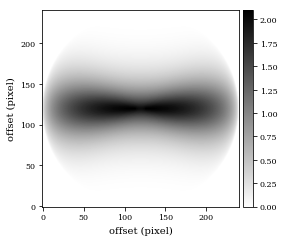

In [82]:
cldmap = cldcube((25,90)) # sig = 25 deg, i = 90 deg (= edge-on view)
plotting.multiplot(cldmap,cmap='gray_r');

In this edge-on view, the line of sight number of clouds along the central radial ray should be 2*N0 (front and back side of the cloud distribution). Since N0=1, we expect this to be =2.

In [89]:
cpix = cldmap.shape[0]//2
print("Central pixel index: ", cpix)
print("Value at (cpix,cpix): %.1f (clouds along LOS)" % cldmap[cpix,cpix])

Central pixel index:  120
Value at (cpix,cpix): 2.0 (clouds along LOS)


# Create an AGN source (high-level API)

In [93]:
imgcube = hypercat.ModelCube(hdffile, hypercube='imgdata', subcube_selection='minimal')

Opening HDF5 file: /home/robert/data/hypercat/hypercat_20180417.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading  hypercube 'imgdata' [shape: (5,10,16,12,5,7,19,121,241)] to RAM (693.51 GB required) ...
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  75.000]  (  5)    15.000, 30.000, 45.000, 60.000, 75.000
   i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, 80.000, 90.000
   Y*    [  5.000 -  20.000]  ( 16)     5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, 12.000, 13.000, 14.000, 15.000, ...
   N*    [  1.000 -  12.000]  ( 12)     1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, ...
   q*    [  0.000 -   2.000]  (  5)     0.000,  0.500,  1.000,  1.500,  2.000
  tv*    [ 10.000 - 160.000

The source needs some properties, such as luminosity, distance, position angle, and a name. If the object name can be resolved by Vizier, a proper WCS will be constructed.

In [118]:
Lbol = '1.6e45 erg/s'
D = '14.4 Mpc'
PA = '42 deg'
objectname = 'ngc1068'

ngc1068 = hypercat.Source(imgcube,luminosity=Lbol,distance=D,pa=PA,objectname=objectname)

Again, let's define suitable CLUMPY model parameters (as before):

In [119]:
vec = (43,75,18,4,0.08,70,10.)

Generate an image of the sky, properly distance-scaled and flux-calibrated:

In [120]:
sky = ngc1068(vec,total_flux_density='6193 mJy') # data from Alonso-Herrero+2011

Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Rotated image (see self.data) by 42.0 deg in direction 'NE'.
Coordinates for source 'ngc1068' resolved. WCS created.


Let's look at this sky:

Plotting panel (0,0)


(<Figure size 288x288 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6bd9f5780>]],
       dtype=object))

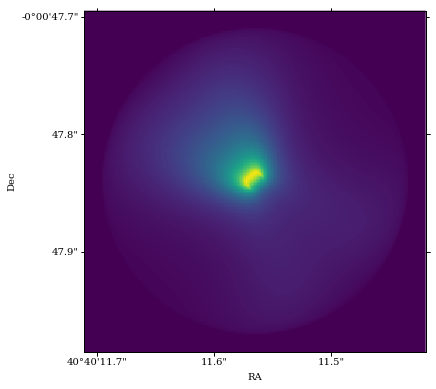

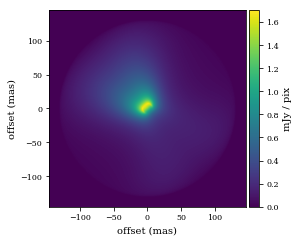

In [121]:
plotting.plot_with_wcs(sky)
plotting.multiplot(sky)

Print some of the properties of the sky image

In [111]:
properties = ('objectname','pa','FOV','F','pixelscale','pixelarea')
for prop in properties:
    print("%12s: "%prop,getattr(sky,prop))

  objectname:  ngc1068
          pa:  42.0 deg
         FOV:  291.1041628123529 mas
           F:  6.192366600016499 Jy
  pixelscale:  1.2079010905076883 mas
   pixelarea:  1.4590250444496626 mas2


## Save image and metadata to FITS file (with header)
The sky image and its metadata can be saved to a FITS file:

In [114]:
ioops.save2fits(sky,'hypercatbasics_ngc1068.fits')

New FITS file 'hypercatbasics_ngc1068.fits' created.
New (empty) primary HDU written.
Data saved as new ImageHDU.
